In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [24]:
# Parameters

r_m = 0.3
h_R = 0.5
k = 0.9
m_n = 0.15
h_n = 0.1
m_f = 0.11
h_f = 0.6
p = 7
r_R = 1
R_constant = 2 # = R
b = 2

In [25]:
# Right-hand side of the coupled system of 2 ODE's
# f(t, y(t)) = dy/dt with y(t) = (R(t), T(t))
def fun(t, y):
    f_0 = r_R*(R_constant + (b*y[1])/k - y[0])
    f_1 = r_m*(y[0]/(h_R+y[0]))*y[1]*(1-(y[1]/k))-m_n*y[1]*(h_n/(y[1]+h_n))-m_f*y[1]*(h_f**p/(y[1]**p+h_f**p))
    f = np.array([f_0, f_1])
    return f

# interval of integration is [0,600]
t_span = (0,600)

In [26]:
# The different initial conditions
# length of T_0, R_0 and colors must match!!!

# initial tree cover in [0,1]
# to modify
T_0 = np.array([0.05,0.25,0.5,0.75,1])

# initial rainfall in [0,5] mm/day
# to modify
R_0 = np.array([1,2,3,4,5])

# color for each (T_0, R_0)
# to modify
colors = ["c","m","y","b","r"]

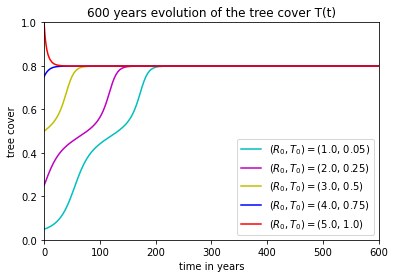

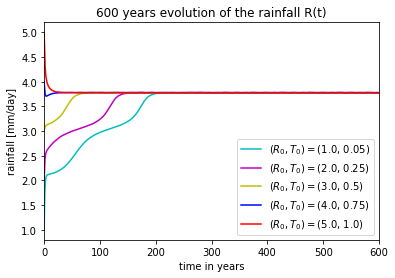

In [27]:
# solve for different initial conditions (R_0, T_0)

for initial_value_idx in range(len(T_0)):
    y_0 = np.array([R_0[initial_value_idx], T_0[initial_value_idx]])
    solution = solve_ivp(fun, t_span, y_0)
    # time points in t_span
    t = solution.t
    # rainfall
    R = solution.y[0]
    # tree cover
    T = solution.y[1]

    # T(t) 
    fig_T = plt.figure(1)
    plt.plot(t, T, colors[initial_value_idx], label = "$(R_0, T_0) = $" + "("  +str(y_0[0]) + ", " + str(y_0[1]) + ")")
    plt.xlabel("time in years") ; plt.xlim((0,600))
    plt.ylabel("tree cover") ; plt.ylim((0,1))
    plt.title("600 years evolution of the tree cover T(t)")
    plt.legend()
    plt.savefig("two-state-model_tree cover.pdf")
    
    # R(t)
    fig_R = plt.figure(2)
    plt.plot(t, R, colors[initial_value_idx], label = "$(R_0, T_0) = $" + "("  +str(y_0[0]) + ", " + str(y_0[1]) + ")")
    plt.xlabel("time in years") ; plt.xlim((0,600))
    plt.ylabel("rainfall [mm/day]") 
    plt.title("600 years evolution of the rainfall R(t)")
    plt.legend()
    plt.savefig("two-state-model_rainfall.pdf")
# fig_T.show()
# fig_R.show()

In [28]:
# The different initial conditions to plot T(600)
# we use 10000 points (R_0, T_0) to plot T(600)
# to modify

R_0_values = np.linspace(0,5,100)
R_0 = np.linspace(R_0_values[0],R_0_values[0],100)
T_0 = np.linspace(0,1,100)

for i in range(1,len(R_0_values)):
    R_0 = np.concatenate((R_0, np.linspace(R_0_values[i],R_0_values[i],100)))
    T_0 = np.concatenate((T_0,np.linspace(0,1,100)))

Approximation de la plus grande valeur de T_0 telle que T(600) = 0: 0.020202020202020204
Approximation de la plus petite valeur de T(600): 6.261289280633023e-06 ~ 0
Approximation de la plus grande valeur de T(600): 0.7989465609760226 ~ 0.8


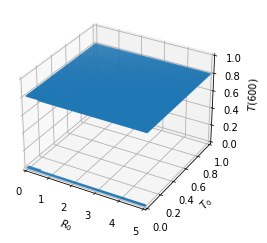

In [39]:
# T(600) for different initial conditions (R_0, T_0)

# final tree cover
T_600 = np.zeros(len(T_0))
ax = plt.figure().add_subplot(projection='3d')
T_0_max = 0 ; T_600_max = 0
for initial_value_idx in range(len(T_0)):
    y_0 = np.array([R_0[initial_value_idx], T_0[initial_value_idx]])
    solution = solve_ivp(fun, t_span, y_0)
    # tree cover
    T = solution.y[1]
    # final tree cover
    T_600[initial_value_idx] = T[-1]
    if T_600[initial_value_idx] < 0.6:
        if T_0_max < T_0[initial_value_idx]:
            T_0_max = T_0[initial_value_idx]
            T_600_min = T_600[initial_value_idx]
    else: 
        if T_600_max < T_600[initial_value_idx]:
            T_600_max = T_600[initial_value_idx]

print("Approximation de la plus grande valeur de T_0 telle que T(600) = 0: " + str(T_0_max))
print("Approximation de la plus petite valeur de T(600): " + str(T_600_min) + " ~ 0")
print("Approximation de la plus grande valeur de T(600): " + str(T_600_max) + " ~ 0.8")

ax.scatter(R_0, T_0, T_600, s = 1)

ax.set(xlim=(0,5),ylim=(0,1),zlim=(0,1),xlabel="$R_0$", ylabel="$T_0$", zlabel="$T(600)$")

plt.savefig("two-state-model_T(600).pdf")

plt.show()

Conclusion:

At equilibrium,

- if $0\leqslant T_0 \leqslant 0.02$, $T(600) = 0$: 

    arid state

- if $0.02 < T_0 \leqslant 1$, $T(600) = 0.8$:

    forest state

There is no initial condition $(R_0, T_0)$ that makes $T(t)$ evolve to a savannah state!